Exercise 6 using Pandas

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "OnlineRetail.csv"
df = pd.read_csv(file_path)
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


1. Find mean, std dev, min, max of unit price.

In [19]:
mean_price = df["UnitPrice"].mean()
std_dev_price = df["UnitPrice"].std()
min_price = df["UnitPrice"].min()
max_price = df["UnitPrice"].max()
print("\nUnit Price Statistics:")
print(f"Mean Unit Price: {mean_price:.2f}")
print(f"Standard Deviation: {std_dev_price:.2f}")
print(f"Min Unit Price: {min_price:.2f}")
print(f"Max Unit Price: {max_price:.2f}")


Unit Price Statistics:
Mean Unit Price: 4.61
Standard Deviation: 96.76
Min Unit Price: -11062.06
Max Unit Price: 38970.00


2. Draw histogram of unitprice field using matplotlib.

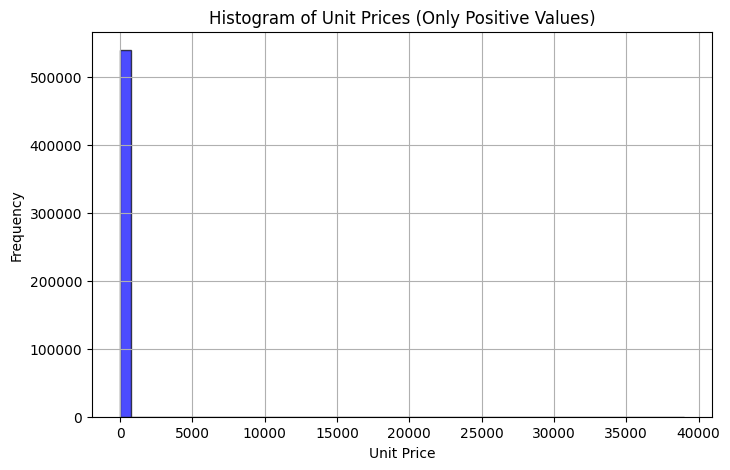

In [21]:
# 2. Plot histogram of unit prices (Only Positive Values)
plt.figure(figsize=(8, 5))

# Sirf positive values filter karo
positive_unit_prices = df[df["UnitPrice"] > 0]["UnitPrice"]

# Histogram plot karo
plt.hist(positive_unit_prices, bins=50, color="blue", alpha=0.7, edgecolor="black")

plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.title("Histogram of Unit Prices (Only Positive Values)")
plt.grid(True)
plt.show()



In [ ]:
3. Find mean of unitprice group by country and plot them.

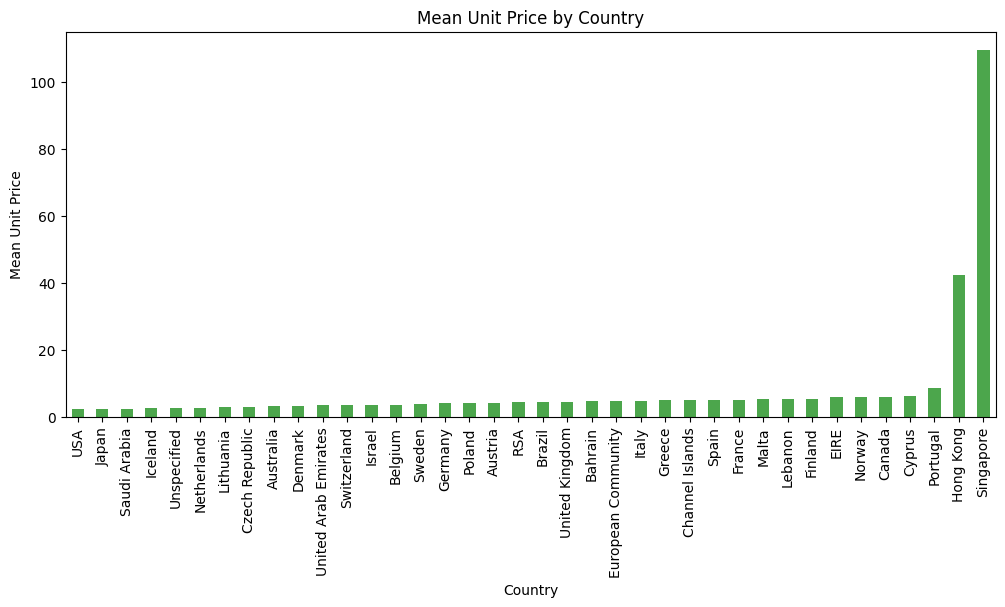

In [5]:
mean_price_by_country = df.groupby("Country")["UnitPrice"].mean()
plt.figure(figsize=(12, 5))
mean_price_by_country.sort_values().plot(kind="bar", color="green", alpha=0.7)
plt.xlabel("Country")
plt.ylabel("Mean Unit Price")
plt.title("Mean Unit Price by Country")
plt.xticks(rotation=90)
plt.show()


4. Find min and max of unit price group by customerID.

In [6]:
min_price_by_customer = df.groupby("CustomerID")["UnitPrice"].min()
max_price_by_customer = df.groupby("CustomerID")["UnitPrice"].max()

print("\nMin Price by Customer (Sample):")
print(min_price_by_customer.head())

print("\nMax Price by Customer (Sample):")
print(max_price_by_customer.head())



Min Price by Customer (Sample):
CustomerID
12346.0    1.04
12347.0    0.25
12348.0    0.29
12349.0    0.42
12350.0    0.85
Name: UnitPrice, dtype: float64

Max Price by Customer (Sample):
CustomerID
12346.0      1.04
12347.0     12.75
12348.0     40.00
12349.0    300.00
12350.0     40.00
Name: UnitPrice, dtype: float64


5. Find cumulative sales monthly and yearly and plot them.

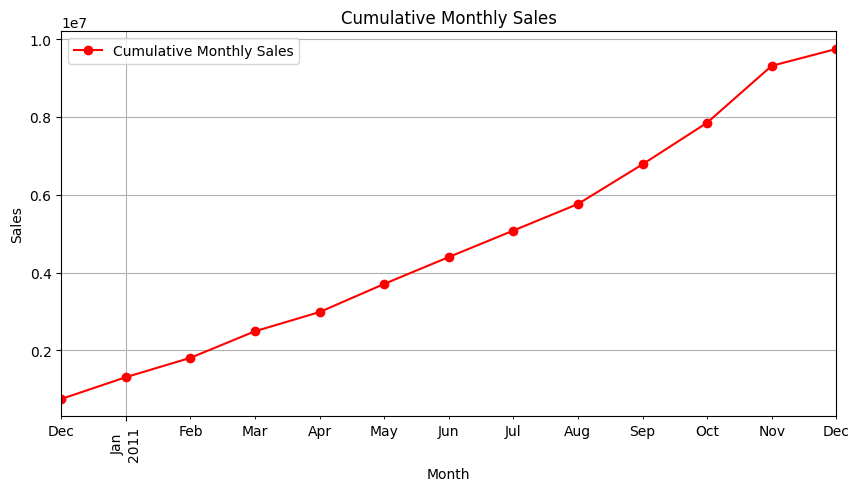

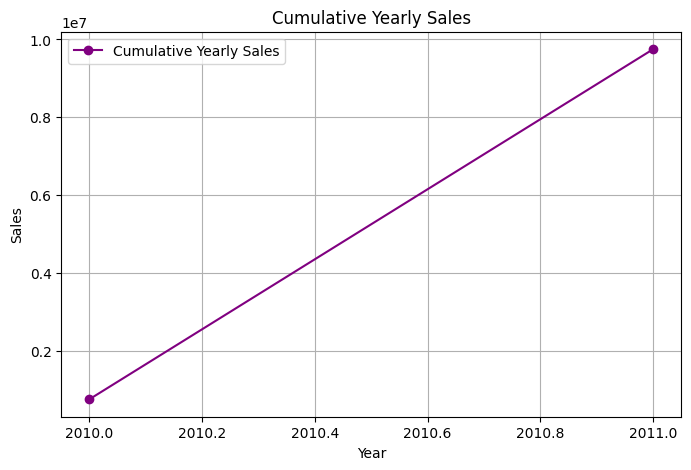

In [7]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.to_period("M")
df["TotalSale"] = df["UnitPrice"] * df["Quantity"]

monthly_sales = df.groupby("Month")["TotalSale"].sum().cumsum()
yearly_sales = df.groupby("Year")["TotalSale"].sum().cumsum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(marker="o", linestyle="-", color="red", label="Cumulative Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.legend()
plt.title("Cumulative Monthly Sales")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
yearly_sales.plot(marker="o", linestyle="-", color="purple", label="Cumulative Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.title("Cumulative Yearly Sales")
plt.grid(True)
plt.show()


Exercise 7
1. Read NIRF data as given in Dataset tab on Google Classroom.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "nirf_engg_ranking_india_2020.csv"
df = pd.read_csv(file_path)
print("\nNIRF Engineering College Rankings 2020 - Data Overview")
print("=" * 60)
print(df.info())
print(df.head())


NIRF Engineering College Rankings 2020 - Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   institute_id  200 non-null    object 
 1   name          200 non-null    object 
 2   link          200 non-null    object 
 3   tlr           200 non-null    float64
 4   rpc           200 non-null    float64
 5   go            200 non-null    float64
 6   oi            200 non-null    float64
 7   perception    200 non-null    float64
 8   city          200 non-null    object 
 9   state         200 non-null    object 
 10  score         200 non-null    float64
 11  rank          200 non-null    int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 18.9+ KB
None
  institute_id                                      name  \
0  IR-E-U-0456     Indian Institute of Technology Madras   
1  IR-E-I-1074      Indian Institute of Technolog

2. Group the data statewise and Count the number of colleges in each state.

In [10]:
statewise_college_count = df.groupby("state")["name"].count().reset_index()
statewise_college_count.columns = ["State", "Number of Colleges"]
print("\nState-wise College Count:")
print(statewise_college_count.to_string(index=False))



State-wise College Count:
            State  Number of Colleges
   Andhra Pradesh                  10
Arunachal Pradesh                   2
            Assam                   3
            Bihar                   2
       Chandigarh                   2
     Chhattisgarh                   1
            Delhi                   7
              Goa                   1
          Gujarat                   7
          Haryana                   6
 Himachal Pradesh                   4
Jammu and Kashmir                   1
        Jharkhand                   4
        Karnataka                  21
           Kerala                   5
   Madhya Pradesh                   5
      Maharashtra                  22
          Manipur                   1
        Meghalaya                   1
           Odisha                   7
      Pondicherry                   2
           Punjab                   8
        Rajasthan                   4
       Tamil Nadu                  35
        Telangana      

3.  Sort the records based on rpc attribute (Research Professional practices).

In [11]:
df_sorted_rpc = df.sort_values(by="rpc", ascending=False)
print("\nTop 10 Colleges Based on RPC Score:")
print(df_sorted_rpc[["rank", "name", "state", "rpc"]].head(10).to_string(index=False))



Top 10 Colleges Based on RPC Score:
 rank                                                    name         state   rpc
    2                    Indian Institute of Technology Delhi         Delhi 96.15
    1                   Indian Institute of Technology Madras    Tamil Nadu 94.64
    3                   Indian Institute of Technology Bombay   Maharashtra 93.37
    5                Indian Institute of Technology Kharagpur   West Bengal 87.11
    4                   Indian Institute of Technology Kanpur Uttar Pradesh 82.08
    6                  Indian Institute of Technology Roorkee   Uttarakhand 76.57
    7                 Indian Institute of Technology Guwahati         Assam 70.73
   15                         Vellore Institute of Technology    Tamil Nadu 64.06
   12 Indian Institute of Technology (Indian School of Mines)     Jharkhand 63.12
   17                                     Jadavpur University   West Bengal 62.04


4. Find the rank of Panjab University as per rpc attribute.

In [14]:
panjab_university = df_sorted_rpc[df_sorted_rpc["name"] == "Panjab University"]
if not panjab_university.empty:
    df_sorted_rpc.loc[df_sorted_rpc["name"] == "Panjab University", "rank"]
    pu_details = df_sorted_rpc[df_sorted_rpc["name"] == "Panjab University"].iloc[0]

    print(f"\nPanjab University Ranking:")
    print(f"  - Rank: {pu_details['rank']}")
    print(f"  - RPC Score: {pu_details['rpc']}")
else:
    print("\nPanjab University not found in the dataset.")


Panjab University Ranking:
  - Rank: 26
  - RPC Score: 43.55


5. List the colleges whose rpc value is less than Panjab University and rank is higher(rank value is less).

In [ ]:
if not panjab_university.empty:
    filtered_colleges = df[(df["rpc"] < pu_details["rpc"]) & (df["rank"] < pu_details["rank"])]
    print("\nColleges with Lower RPC but Higher Rank than Panjab University:")
    print(filtered_colleges[["rank", "name", "state", "rpc"]].to_string(index=False))
else:
    print("\nSkipping step as Panjab University is not found.")



Colleges with Lower RPC but Higher Rank than Panjab University:
 rank                                                        name            state   rpc
   19                   National Institute of Technology Warangal        Telangana 38.12
   22                  Indian Institute of Technology Bhubaneswar           Odisha 37.17
   23                    National Institute of Technology Calicut           Kerala 31.30
   24                  Indian Institute of Technology Gandhinagar          Gujarat 34.55
   25                        Indian Institute of Technology Ropar           Punjab 30.54
   26                        Indian Institute of Technology Patna            Bihar 39.24
   30                     Birla Institute of Technology & Science        Rajasthan 34.87
   31                        Indian Institute of Technology Mandi Himachal Pradesh 36.80
   33            Indian Institute of Space Science and Technology           Kerala 24.02
   34                                       S

6. Draw the Histogram for colleges based on tlr values by dividing the overall data in 10 bins.

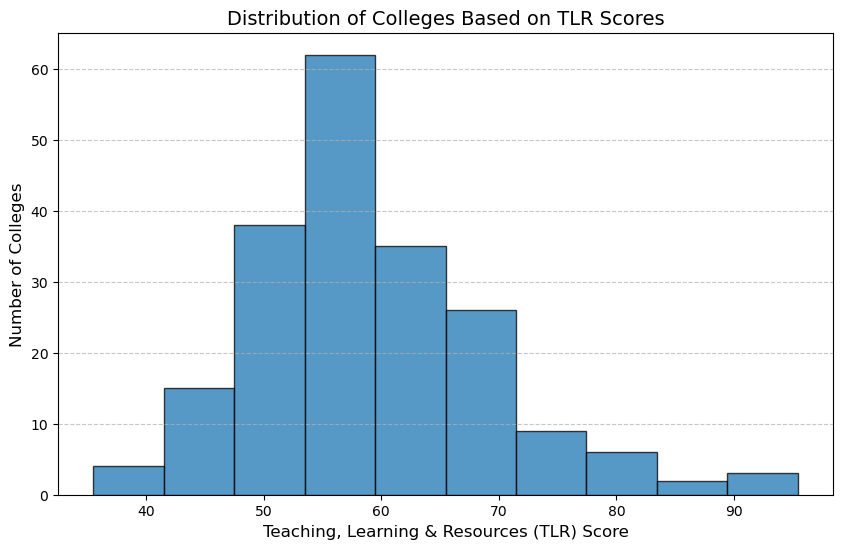

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df["tlr"], bins=10, edgecolor="black", alpha=0.75)
plt.xlabel("Teaching, Learning & Resources (TLR) Score", fontsize=12)
plt.ylabel("Number of Colleges", fontsize=12)
plt.title("Distribution of Colleges Based on TLR Scores", fontsize=14)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()